In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [3]:
df = pd.read_csv("/home/dsc/Data/us_dot/otp/On_Time_On_Time_Performance_2015_1.csv")

/usr/lib64/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
len(df)

469968

In [5]:
minidf22= df[df["FlightDate"]=='2015-01-22']
minidf23 = df[df["FlightDate"]=='2015-01-23']

In [6]:
by_carrier_22 = minidf22.groupby("Carrier")
by_carrier_23 = minidf23.groupby("Carrier")

In [7]:
def fLenght(s):
    return len(s)

In [8]:
a22jan = by_carrier_22.apply(fLenght)
a23jan = by_carrier_23.apply(fLenght)

a22jan = a22jan.reset_index()
a23jan= a23jan.reset_index()

In [9]:
evodf = pd.merge(a22jan,a23jan,on="Carrier")
evodf.columns = ["Carrier","2015-01-22","2015-01-23"]

In [10]:
evodf

,Carrier,2015-01-22,2015-01-23
0,AA,1443,1445
1,AS,436,439
2,B6,710,709
3,DL,2304,2303
4,EV,1728,1743
5,F9,223,229
6,HA,208,222
7,MQ,1009,1010
8,NK,281,285
9,OO,1616,1625


In [11]:
evodf["Evolution"]=(evodf["2015-01-22"]-evodf["2015-01-23"])/evodf["2015-01-22"]

In [12]:
evodf["Evolution"] = evodf["Evolution"]*100
evodf

,Carrier,2015-01-22,2015-01-23,Evolution
0,AA,1443,1445,-0.138600
1,AS,436,439,-0.688073
2,B6,710,709,0.140845
3,DL,2304,2303,0.043403
4,EV,1728,1743,-0.868056
5,F9,223,229,-2.690583
6,HA,208,222,-6.730769
7,MQ,1009,1010,-0.099108
8,NK,281,285,-1.423488
9,OO,1616,1625,-0.556931


In [13]:
def fRound2(f):
    return round(f,2)

In [14]:
def evo(s):
    f22j = float(s["22jan"])
    f23j = float(s["23jan"])
    
    return round(100*(f22j-f23j)/f22j,2)
    

In [15]:
evodf.columns=[["Carrier","22jan","23jan","Evolution1"]]
fila = evodf.ix[2]
fila

Carrier              B6
22jan               710
23jan               709
Evolution1    0.1408451
Name: 2, dtype: object

In [16]:
evo(fila)

0.14

In [17]:
evodf.apply(evo,axis=1)


0    -0.14
1    -0.69
2     0.14
3     0.04
4    -0.87
5    -2.69
6    -6.73
7    -0.10
8    -1.42
9    -0.56
10    0.00
11    0.09
12   -2.45
13    0.36
dtype: float64

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

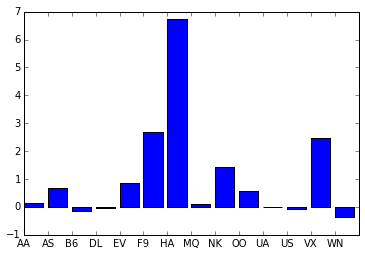

In [19]:
loc = range(0,len(evodf))
plt.bar(loc,evodf["Evolution1"]*-1)
plt.xticks(loc,evodf["Carrier"])
plt.show()

In [20]:
#Create new df evodf sorted by Evolution1
#Plot it on a chart

evodf["Evolution1"] = evodf["Evolution1"]*-1

In [21]:
evodf=evodf.sort("Evolution1",ascending=False).reset_index()

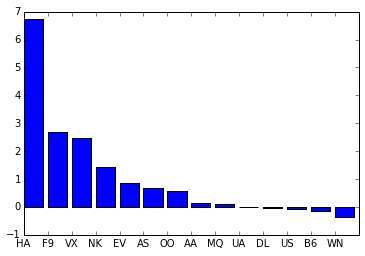

In [22]:
loc = range(0,len(evodf))
plt.bar(loc,evodf["Evolution1"])
plt.xticks(loc,evodf["Carrier"])
plt.show()

In [23]:
#El groupby aplica la función al elemento dentro del objeto
#ie si aplicamos a un groupby lo aplicamos a sus dataframes,b
si a dataframes a sus series y si es una serie a cada objeto dentro de esa serie

SyntaxError: invalid syntax (<ipython-input-23-e4b879910866>, line 3)

In [ ]:
by_carrier = df.groupby("Carrier")

In [ ]:
by_carrier.agg(["mean","count","sum","size"])

In [ ]:
by_carrier["DayofMonth"].agg(["mean","count","sum","size"])

In [ ]:
daystatistics = by_carrier["DayofMonth"].agg(["mean","count","size"])

In [ ]:
daystatistics["Coverage"]=daystatistics["count"]/len(df)

In [ ]:
daystatistics